## **Autores**

Rodrigo Makoto Takumi **176897**

Carlos Augusto Jardim Chiarelli **165685**

# **15 - Critério de estabilidade de Nyquist**

$$ $$

In [1]:
# bibliotecas
import numpy as np
import sympy as sp
import matplotlib.pyplot       as plt
#!pip install control
import control                 as clt
from   numpy                   import sqrt
from   scipy.signal            import lsim, lti, step, impulse, freqresp, bode
from   scipy                   import spatial
from   IPython.core.pylabtools import figsize
from   IPython.display         import Image
from   platform                import python_version

figsize(12, 8)                         # tamanho gráficos
plt.rcParams.update({'font.size': 14}) # tamanho da fonte
sp.init_printing()                     # printar variáveis simbólicas

print('\nVersão da Linguagem Python usada neste relatório: %s\n' % python_version())


Versão da Linguagem Python usada neste relatório: 3.7.6



$$$$
# **Exercício 15.1)**

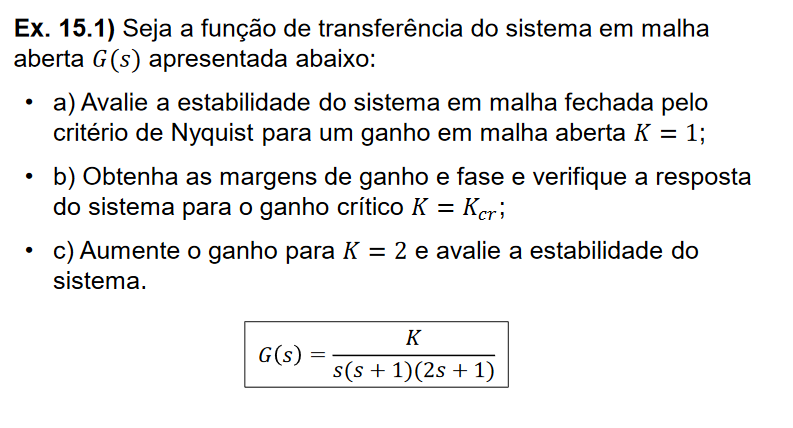

In [2]:
Image('../dados/imagens/15_exe_1.png')

$$$$
* Função de transferência $K=1$
$$$$

In [3]:
s   = sp.symbols('s')
den = s*(s+1)*(2*s+1)

sp.expand(den, s)

In [4]:
np.roots([2,3,1,0])

array([-1. , -0.5,  0. ])

$$$$
Acima vemos os polos de $G(s)$. Onde $P=0$
$$$$

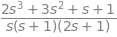

In [5]:
G = 1/den
F = 1+G
sp.factor(F)

$$$$
Acima vemos a TF $F(s)$ e abaixo os seus pólos onde $Z=0$.
$$$$

In [6]:
print('Zeros de F(s):\n')
for polo in np.roots([2, 3, 1, 1]): print(np.round(polo,2)) 

print()

Zeros de F(s):

(-1.4+0j)
(-0.05+0.6j)
(-0.05-0.6j)



In [7]:

Gs = ([1], [2, 3, 1, 0]) # num e den

w, H = freqresp(Gs)

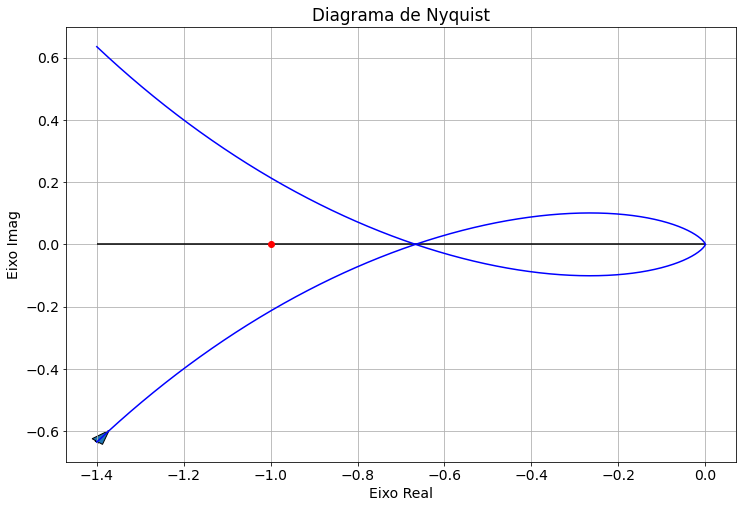

In [8]:
def obtem_flecha(vet_complex, filtroReal):
    filtro = vet_complex.real > filtroReal
    H_real, H_imag = vet_complex.real[filtro], vet_complex.imag[filtro]

    flecha = {}
    x0, y0 = H_real[0], H_imag[0]
    x1, y1 = H_real[1], H_imag[1]
    dx = x1-x0
    dy = y1-y0
    
    return x0, y0, x1, y1

x, y, dx, dy = obtem_flecha(H, -1.4)

filtro = H.real > -1.4

H_real, H_imag = H.real[filtro], H.imag[filtro]

plt.plot(H_real,  H_imag, color='blue')
plt.plot(H_real, -H_imag, color='blue')
plt.plot(-1, 0, marker='o', color='r')
plt.arrow(x=x, y=y, dx=-(x-dx), dy=-(y-dy), width=0.01)

#plt.annotate("here", xy=(x, y), xytext=(dx, dy), arrowprops=dict(arrowstyle="->"))

plt.hlines(0, -1.4, 0)
plt.title('Diagrama de Nyquist')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imag')
plt.grid()

$$$$
* diagrama não envolve o ponto -1 $\rightarrow N=0 $
$$$$
* $Z=N+P \rightarrow 0 = 0$
$$$$
* sistema em malha fechada é estável para $K=1$
$$$$

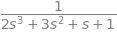

In [9]:
sp.factor(G/(1+G), s)

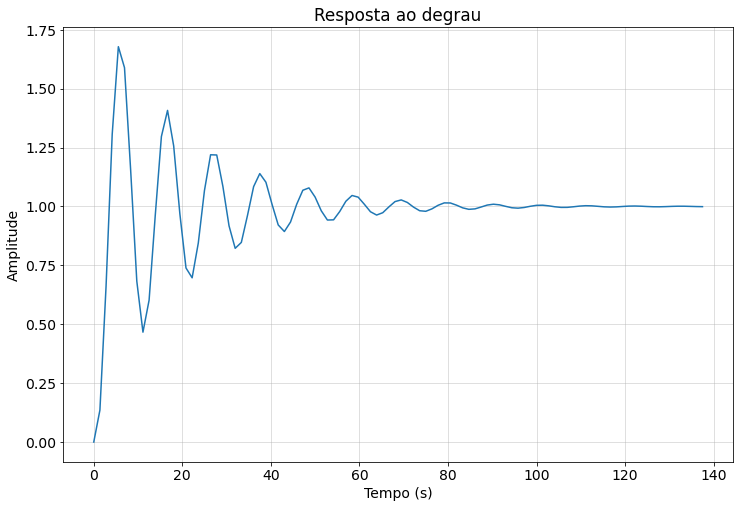

In [10]:

Gs = clt.tf([1], [2,3,1,0])
Hs = Gs/(1+Gs)

t, yout = clt.step_response(Hs)

plt.plot(t, yout)
plt.title('Resposta ao degrau')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.grid(alpha=.5)

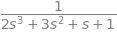

In [11]:
s   = sp.symbols('s')
den = s*(s+1)*(2*s+1)
G   = 1/den
H   = G/(1+G)  

sp.factor(H, s)

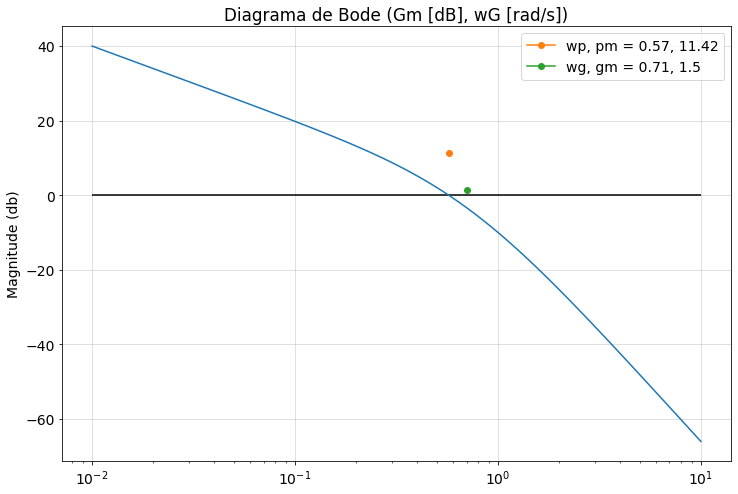

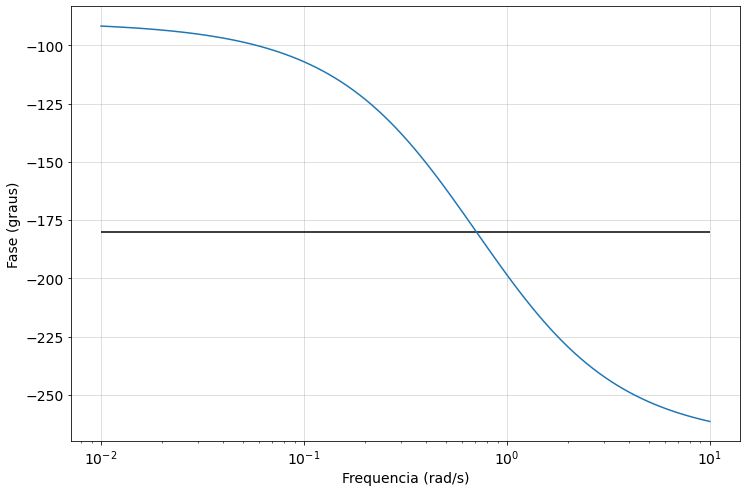

In [12]:
tf = ([1], [2,3,1,0])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.plot(wp, pm, marker='o', label=f'wp, pm = {round(wp,2)}, {round(pm,2)}')
plt.plot(wg, gm, marker='o', label=f'wg, gm = {round(wg,2)}, {round(gm,2)}')
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode (Gm [dB], wG [rad/s])')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

In [13]:
print('gm, pm, wg, wp')
print(f'{gm, pm, wg, wp}')

gm, pm, wg, wp
(1.4999999999999998, 11.424981844921405, 0.7071067811865475, 0.571601521980537)


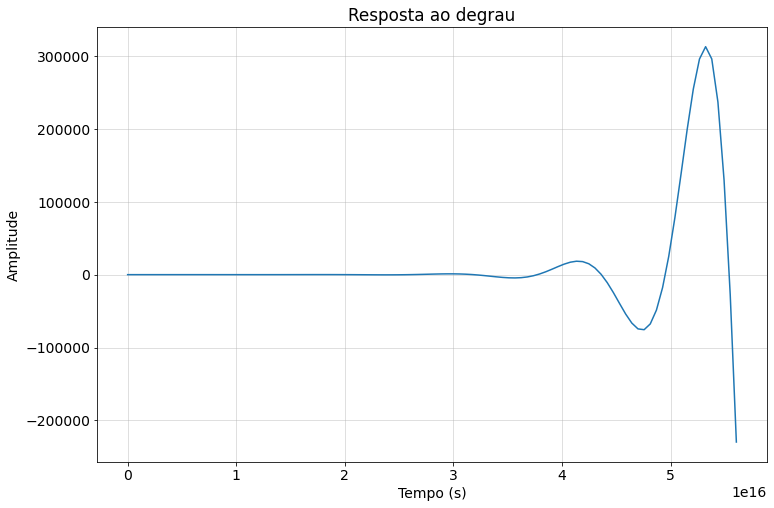

In [14]:
K=1.5
Gs = clt.tf([1.5], [2,3,1,0])
Hs = Gs/(1+Gs)

t, yout = clt.step_response(Hs)

plt.plot(t, yout)
plt.title('Resposta ao degrau')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.grid(alpha=.5)

$$$$
* Função de transferência $K=2 > K_{cr}$
$$$$

In [15]:
print('Polos Gs:')
print(np.roots([2,3,1,0]))

print('\nZeros de F(s):\n')
for polo in np.roots([2, 3, 1, 2]): print(np.round(polo,1)) 

print()

Polos Gs:
[-1.  -0.5  0. ]

Zeros de F(s):

(-1.6+0j)
0.8j
-0.8j



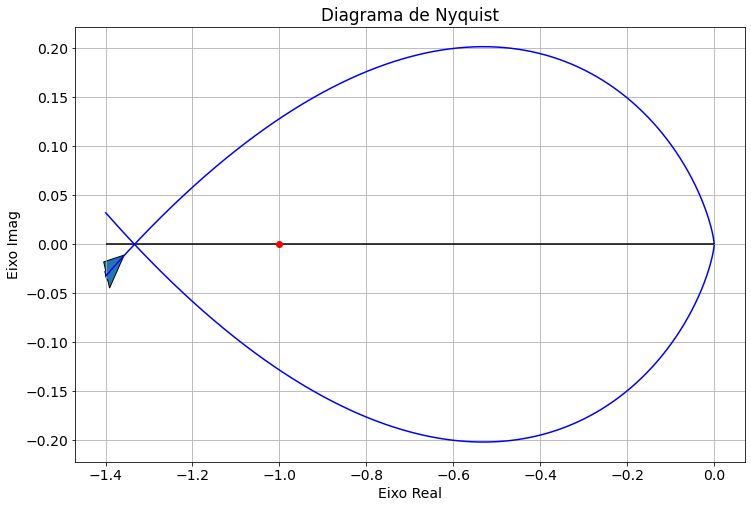

In [16]:

Gs = ([2], [2, 3, 1, 0]) # num e den

w, H = freqresp(Gs)

x, y, dx, dy = obtem_flecha(H, -1.4)

filtro = H.real > -1.4

H_real, H_imag = H.real[filtro], H.imag[filtro]

plt.plot(H_real,  H_imag, color='blue')
plt.plot(H_real, -H_imag, color='blue')
plt.plot(-1, 0, marker='o', color='r')
plt.arrow(x=x, y=y, dx=-(x-dx), dy=-(y-dy), width=0.01)

#plt.annotate("here", xy=(x, y), xytext=(dx, dy), arrowprops=dict(arrowstyle="->"))

plt.hlines(0, -1.4, 0)
plt.title('Diagrama de Nyquist')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imag')
plt.grid()

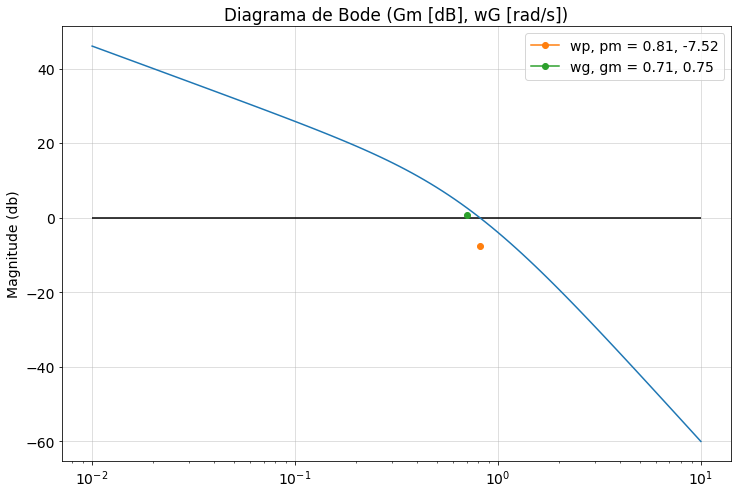

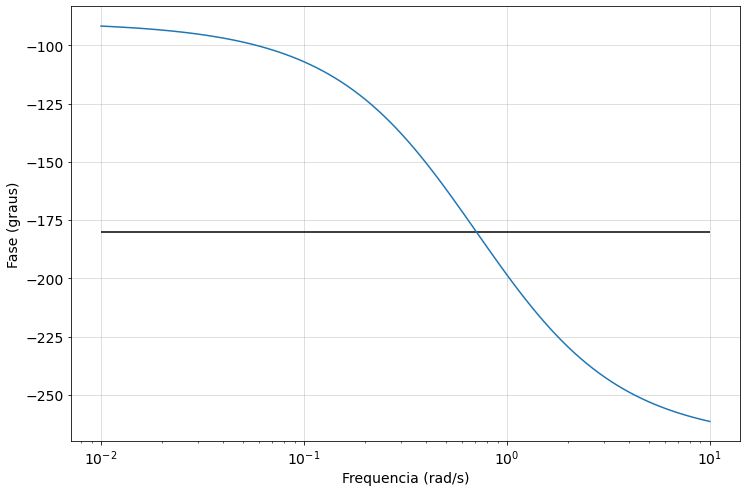

In [17]:
tf = ([2], [2,3,1,0])
gm, pm, wg, wp = clt.margin(clt.tf([2], [2,3,1,0]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.plot(wp, pm, marker='o', label=f'wp, pm = {round(wp,2)}, {round(pm,2)}')
plt.plot(wg, gm, marker='o', label=f'wg, gm = {round(wg,2)}, {round(gm,2)}')
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode (Gm [dB], wG [rad/s])')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

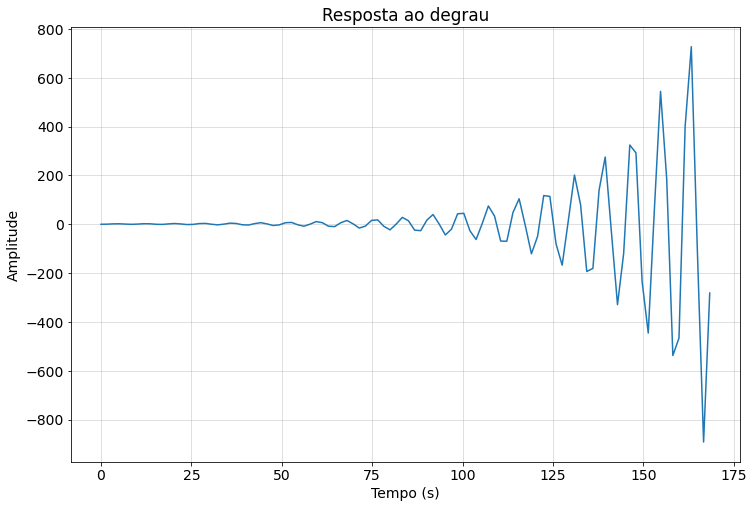

In [18]:
K=2
Gs = clt.tf([K], [2,3,1,0])
Hs = Gs/(1+Gs)

t, yout = clt.step_response(Hs)

plt.plot(t, yout)
plt.title('Resposta ao degrau')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.grid(alpha=.5)

$$$$
# **Exercício 15.2)**

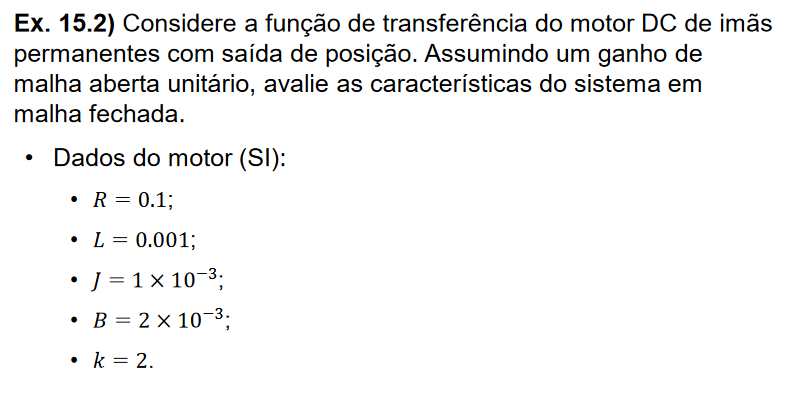

In [19]:
Image('../dados/imagens/15_exe_2.png')

In [20]:
R = 0.1
L = 0.001
J = 1e-3
B = 2e-3
K = 2


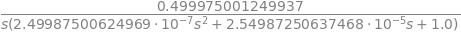

In [21]:
s = sp.symbols('s')
G = K/(s*((s*L+R)*(s*J+B)+K**2))

sp.factor(G, s)

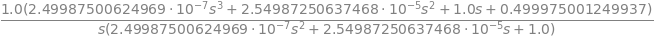

In [22]:
sp.factor(1+G, s)

In [23]:
print('Polos Gs:')
for polo in np.roots([2.5e-7, 2.5e-5, 1, 0]): print(np.round(polo,1)) 

print('\nZeros de F(s):\n')
for zero in np.roots([2.5e-7, 2.5e-5, 1, 0, 0.5]): print(np.round(zero,1)) 

print()

Polos Gs:
(-50+1999.4j)
(-50-1999.4j)
0j

Zeros de F(s):

(-50+1999.4j)
(-50-1999.4j)
0.7j
-0.7j



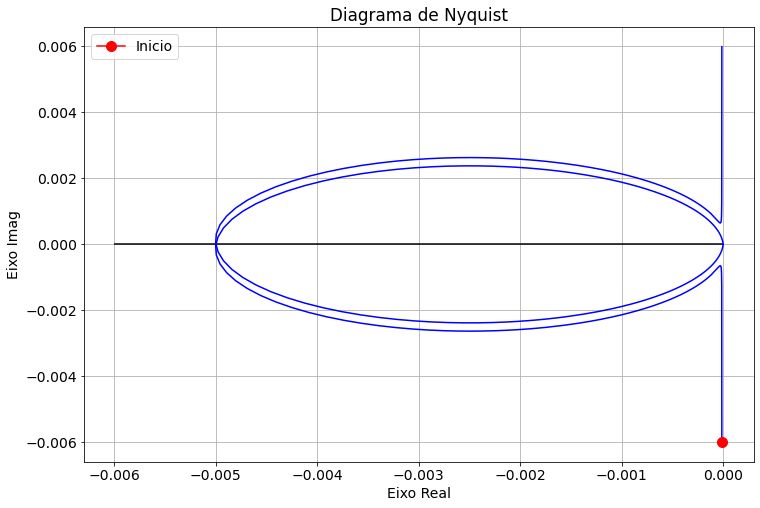

In [25]:

Gs = ([0.5], [2.5e-7, 2.5e-5, 1, 0]) # num e den

w, H = freqresp(Gs)

limReal = -6e-3
limImag = -6e-3

#x, y, dx, dy = obtem_flecha(H, limReal, limImag)

filtro = (H.real > limReal) & ((H.imag > limImag)&(H.imag < -limImag))

H_real, H_imag = H.real[filtro], H.imag[filtro]

plt.plot(H_real,  H_imag, color='blue')
plt.plot(H_real, -H_imag, color='blue')
plt.plot(H_real[0], H_imag[0], marker='o', color='r', markersize=10, label='Inicio')

#plt.annotate("here", xy=(x, y), xytext=(dx, dy), arrowprops=dict(arrowstyle="->"))

plt.hlines(0, limReal, 0)
plt.title('Diagrama de Nyquist')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imag')
plt.grid()
plt.legend()

$$$$
* $N=0$
$$$$
* $P=0$
$$$$
* $Z=0$
$$$$
* $Z=N+P \rightarrow 0 = 0$
$$$$
* sistema em malha fechada estável
$$$$


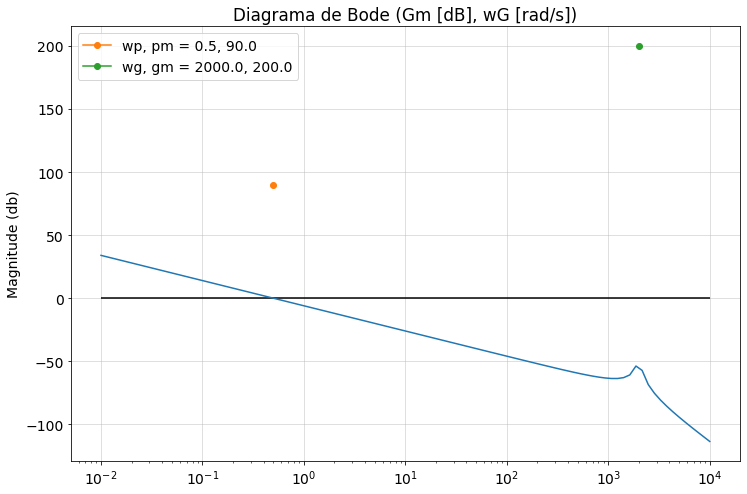

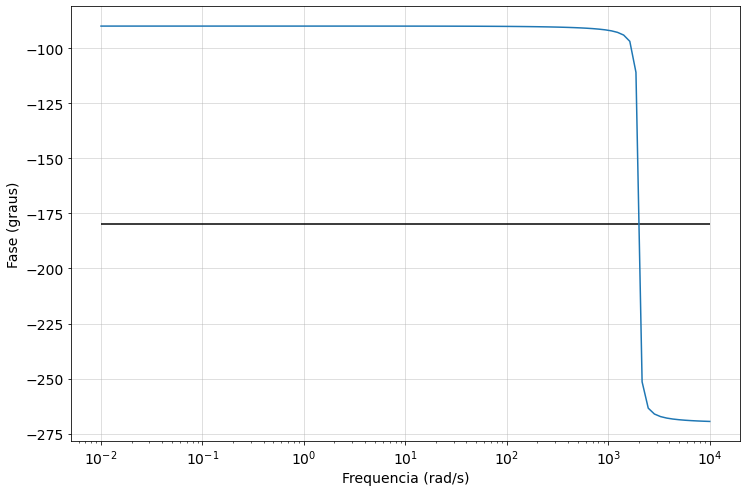

In [26]:
tf = ([0.5], [2.5e-7, 2.5e-5, 1, 0])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.plot(wp, pm, marker='o', label=f'wp, pm = {round(wp,2)}, {round(pm,2)}')
plt.plot(wg, gm, marker='o', label=f'wg, gm = {round(wg,2)}, {round(gm,2)}')
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode (Gm [dB], wG [rad/s])')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=3.28836e-18): result may not be accurate.
  return solve(Q, P)


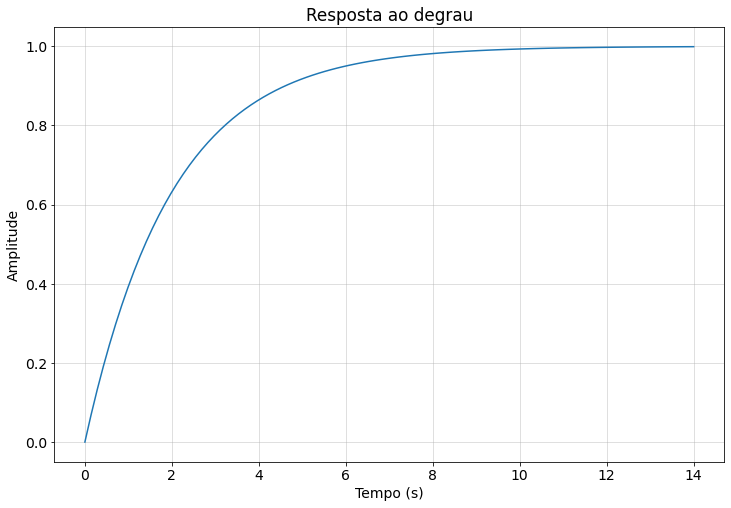

In [27]:
K=1
Gs = clt.tf([K*0.5], [2.5e-7, 2.5e-5, 1, 0])
Hs = Gs/(1+Gs)

#[0.5], [2.5e-7, 2.5e-5, 1, 0]

t, yout = clt.step_response(Hs)

plt.plot(t, yout)
plt.title('Resposta ao degrau')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.grid(alpha=.5)